# Notebook to interactively manipulate equilibrium boundary and getting corresponding MXH coefficients

In [10]:
using FUSE
using Plots; gr();
using IMAS

In [71]:
using Interact

my_mxh = Dict()
upnull = false
lonull = false
@manipulate for mhx_order in 1:10,
    a in LinRange(0.1, 10, 101),
    eps in LinRange(0.1, 1, 101),
    kapu in LinRange(1.0, 3.0, 101),
    kapl in LinRange(1.0, 3.0, 101),
    delu in LinRange(-1.0, 1.0, 101),
    dell in LinRange(-1.0, 1.0, 101),
    zetaou in LinRange(-sqrt(2) / 2, 1.0, 101),
    zetaiu in LinRange(-sqrt(2) / 2, 1.0, 101),
    zetaol in LinRange(-sqrt(2) / 2, 1.0, 101),
    zetail in LinRange(-sqrt(2) / 2, 1.0, 101)#,
    #upnull in [false,true],
    #lonull in [false,true],

    r, z, zref = try
        IMAS.boundary_shape(; a, eps, kapu, kapl, delu, dell, zetaou, zetaiu, zetail, zetaol, zoffset=0.0, upnull, lonull)
    catch e
        [NaN], [NaN], [NaN]
    end
    my_mxh["current"] = mxh = IMAS.MXH(r, z, mhx_order)

    plot(r, z; aspect_ratio=:equal, lw=2, label="numerical")
    plot!(mxh,label="MXH")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["mhx_order"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 10, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable(5), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/weisbergd/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/weisbergd/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/weisbergd/.julia/packages/InteractBase/Qhvxg/src/../assets/all.js"), Asset("css", nothing, "/home/weisbergd/.julia/packages/InteractBase/Qhvxg/src/../assets/style.css"), Asset("css", nothing, "/home/weisbergd/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00002b277ead7820, Task (runnable) @0x00002b277ead7820), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"11241804783500533234\",\"id\":\"16037003077948311362\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"11241804783500533234\",\"id\":\"1237698080849076617\",\"type\":\"obser

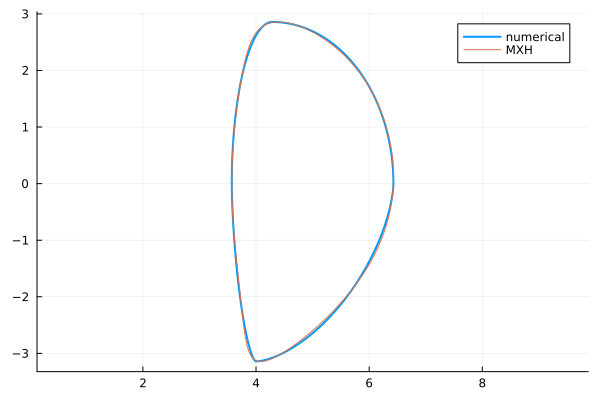

R0: 5.000054394587002
Z0: -0.14285714285714302
ϵ: 0.28570029868693436
κ: 2.1000799630875866
c0: 0.08929794323878393
c: [0.10289930275360348, -0.04364023802647035, -0.018031586770680792, -0.004081354979971939]
s: [0.502911649865262, 0.043980244414311205, -0.06211906809472907, 0.013187382063260922]


In [114]:
mhx_order = 4

R0 = 5.0
eps = 1/3.5
a = R0*eps
kapu = 2.0
kapl = 2.2
delu = 0.5
dell = 0.7
zetaou = -0.0
zetaol = -0.2
zetaiu = -0.0
zetail = -0.2
upnull = false
lonull = false

r, z, zref = try
    IMAS.boundary_shape(; a, eps, kapu, kapl, delu, dell, zetaou, zetaiu, zetaol, zetail, zoffset=0.0, upnull, lonull)
catch e
    [NaN], [NaN], [NaN]
end

mxh = IMAS.MXH(r, z, mhx_order)
plot(r, z; aspect_ratio=:equal, lw=2, label="numerical")
display(plot!(mxh,label="MXH"))
display(mxh)

In [115]:
mxh_vect = IMAS.flat_coeffs(mxh)

13-element Vector{Float64}:
  5.000054394587002
 -0.14285714285714302
  0.28570029868693436
  2.1000799630875866
  0.08929794323878393
  0.10289930275360348
 -0.04364023802647035
 -0.018031586770680792
 -0.004081354979971939
  0.502911649865262
  0.043980244414311205
 -0.06211906809472907
  0.013187382063260922

In [123]:
# CHEASE deadstart MXH
dd = IMAS.dd()
ini, act = FUSE.case_parameters(:ITER, init_from=:scalars);
ini.equilibrium.boundary_from = :MXH_params
ini.equilibrium.MXH_params = mxh_vect
ini.equilibrium.xpoints_number = 1
act.ActorEquilibrium.model = :CHEASE

act

FUSE.ParametersActors{Float64}
├─ ActorBalanceOfPlant
│  ├─ generator_conversion_efficiency ➡ 0.95
│  └─ do_plot ➡ false
├─ ActorBlanket
│  ├─ minimum_first_wall_thickness ➡ 0.02 [m]
│  ├─ blanket_multiplier ➡ 1.2
│  ├─ thermal_power_extraction_efficiency ➡ 1.0
│  └─ verbose ➡ false
├─ ActorCHEASE
│  ├─ free_boundary ➡ true
│  ├─ clear_workdir ➡ true
│  └─ rescale_eq_to_ip ➡ true
├─ ActorCXbuild
│  ├─ rebuild_wall ➡ true
│  └─ do_plot ➡ false
├─ ActorCoreTransport
│  └─ model ➡ :Tauenn
├─ ActorCosting
│  ├─ model ➡ :ARIES
│  ├─ construction_start_year ➡ 2023 [year]
│  ├─ future_inflation_rate ➡ 0.025
│  ├─ plant_lifetime ➡ 40 [year]
│  ├─ availability ➡ 0.8
│  ├─ land_space ➡ 1000.0 [acres]
│  ├─ building_volume ➡ 140000.0 [m^3]
│  ├─ interest_rate ➡ 0.05
│  ├─ indirect_cost_rate ➡ 0.4
│  ├─ escalation_fraction ➡ 0.05
│  ├─ blanket_lifetime ➡ 6.8 [year]
│  ├─ construction_lead_time ➡ 8.0 [year]
│  ├─ fixed_charge_rate ➡ 0.078
│  ├─ initial_cost_blanket ➡ 200.0 [$M]
│  ├─ initial_cost_d

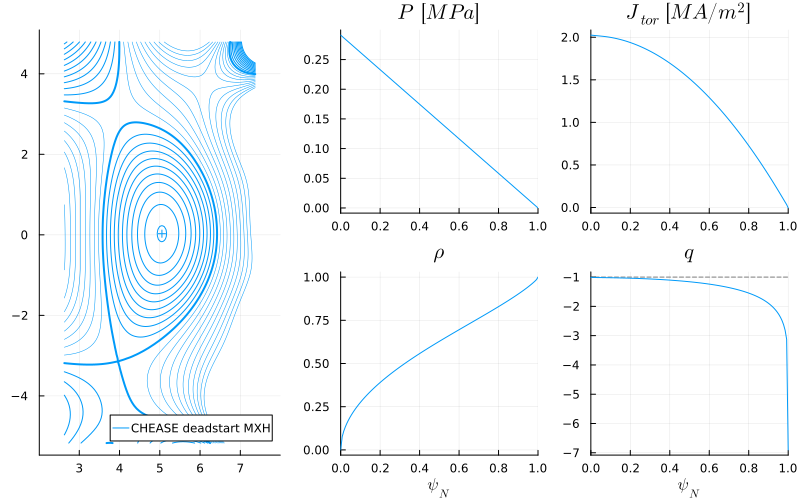

In [120]:
dd = FUSE.init(dd, ini, act)
mxh_plot = plot(dd.equilibrium, label="CHEASE deadstart MXH")
display(mxh_plot)